In [1]:
import os
import gc
import torch
import contextlib

from FedSGDController import FedSGDController

# since this Notebook is in the code folder, we need to go up one level, so every module works as expected
if(os.getcwd().endswith("code")):
    os.chdir("..")
print(os.getcwd())

D:\Development\Uni\FL\FederatedLearning


In [2]:
def run_experiment(config: dict):
    controller = FedSGDController("models/host_model_50_epochs.pth", config)
    os.makedirs(os.path.join("results", controller.experiment_name), exist_ok=True)
    with open(os.path.join("results", controller.experiment_name, "output"), "w") as f, contextlib.redirect_stdout(f):
        controller.run(test=True)
        controller.host.save_model(os.path.join("results", controller.experiment_name), f"model_50_{controller.experiment_name}.pth")

    del controller
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

# FedSGD Experiments
### Experiment 2.1 - Ground Truth Labels

Epoch 1/1: 100%|██████████| 20/20 [00:06<00:00,  2.91it/s]


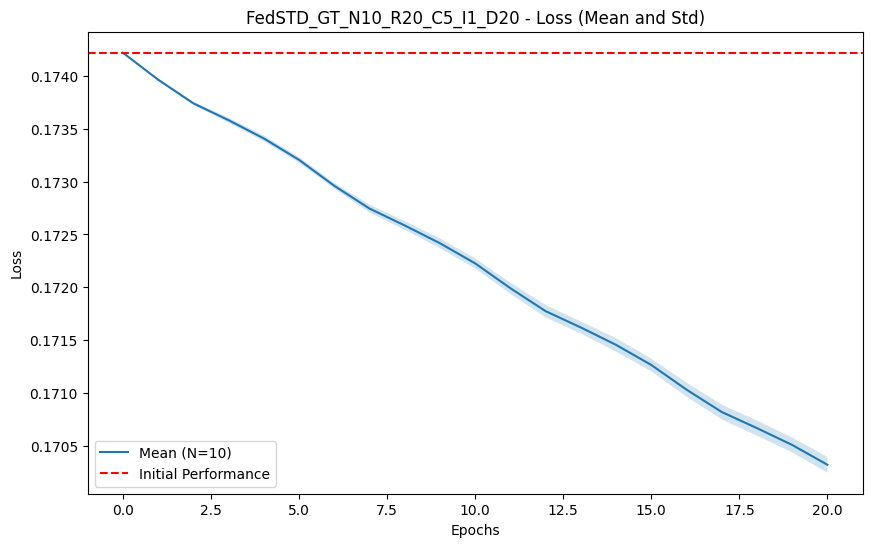

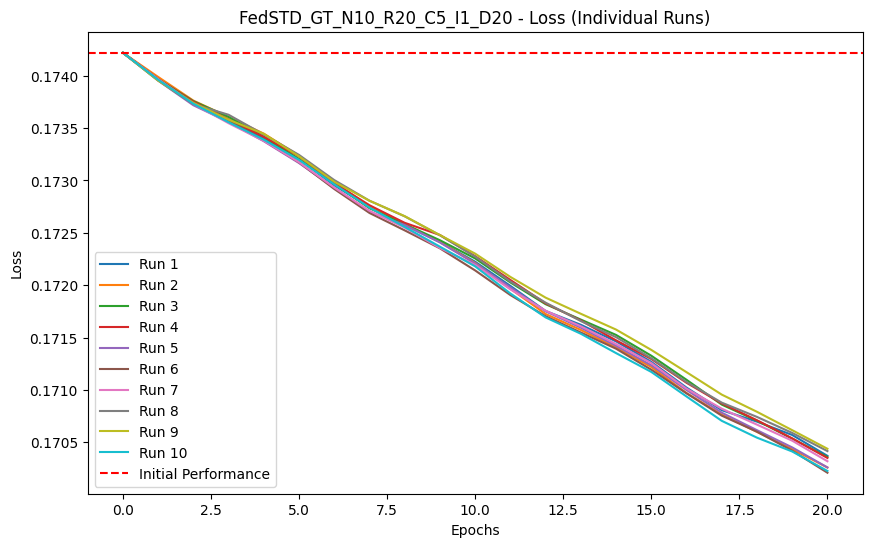

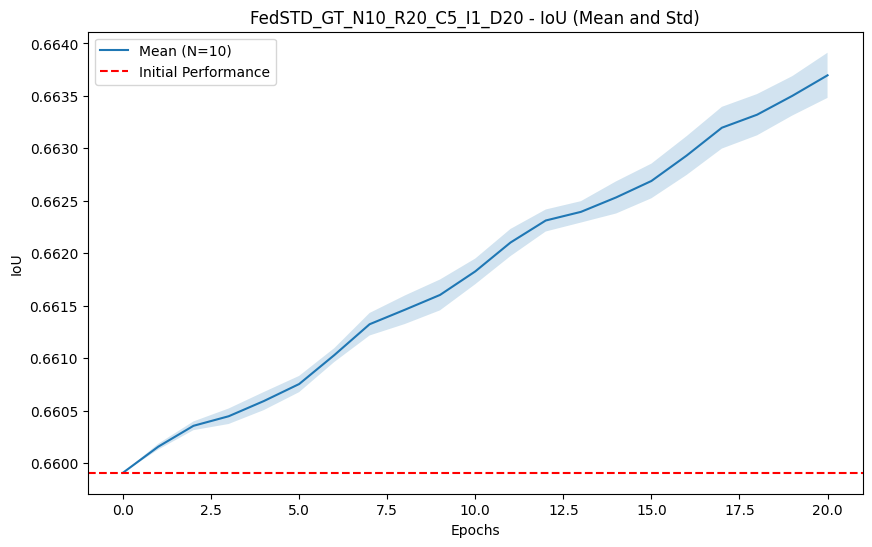

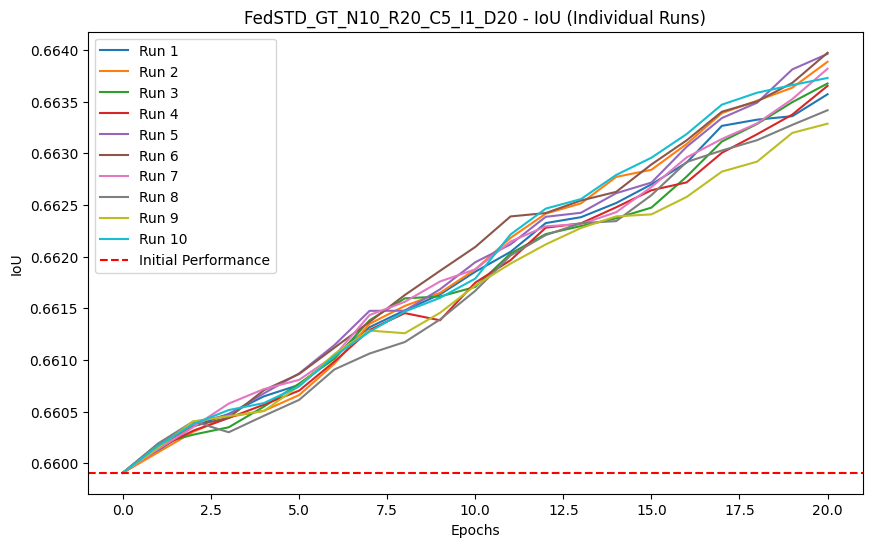

In [3]:
config = {
    "RUNS": 10,
    "ROUNDS": 20,
    "N_CLIENTS": 5,
    "CLIENT_ITERATIONS": 1,
    "N_DATAPOINTS_PER_ROUND": 20,
    "USE_MCD": False
}
    
run_experiment(config)

### Experiment 2.2 - MCD

Epoch 1/1: 100%|██████████| 20/20 [00:10<00:00,  1.96it/s]


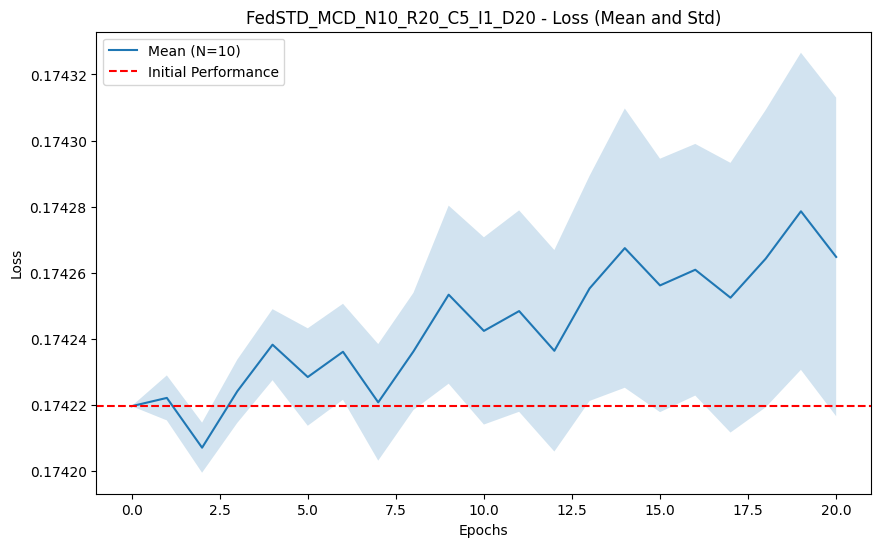

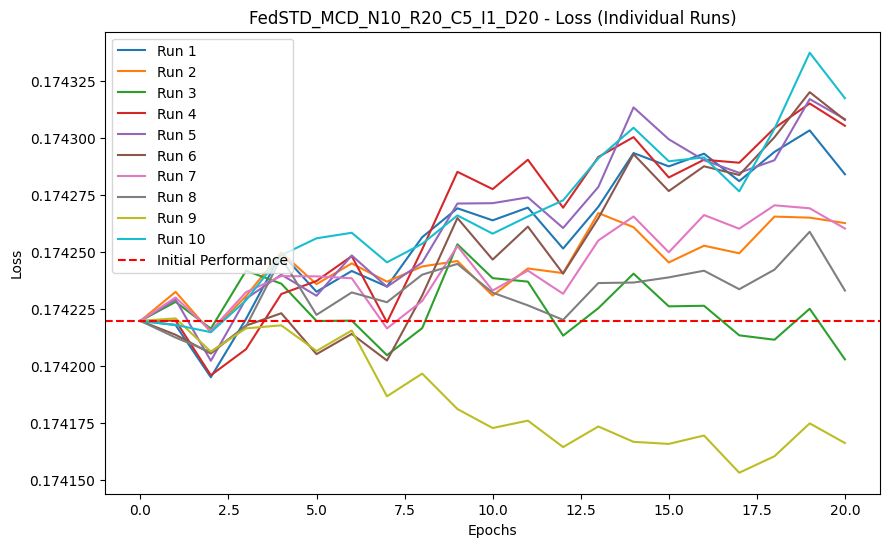

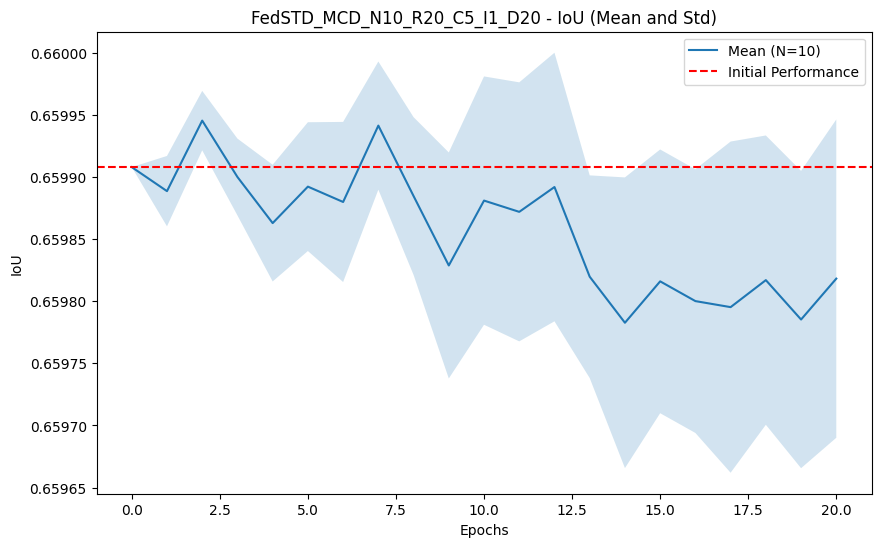

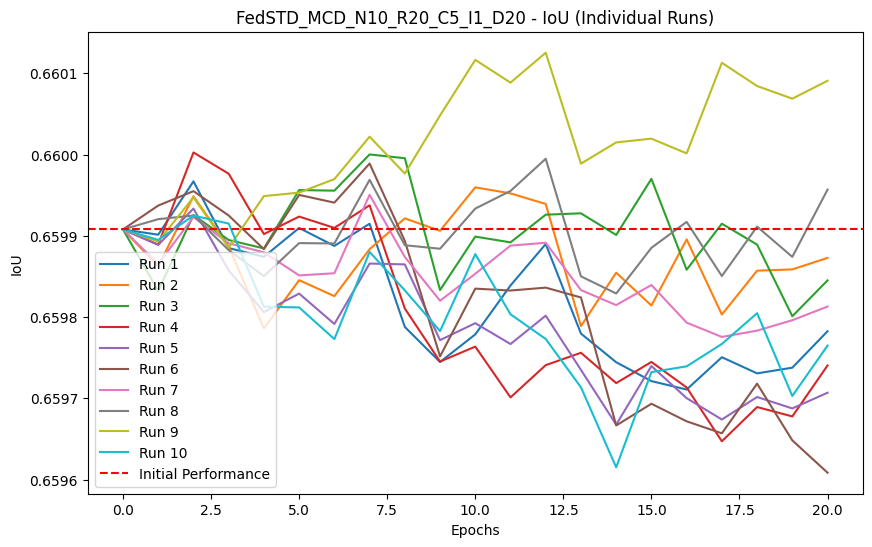

In [4]:
config = {
    "RUNS": 10,
    "ROUNDS": 20,
    "N_CLIENTS": 5,
    "CLIENT_ITERATIONS": 1,
    "N_DATAPOINTS_PER_ROUND": 20,
    "USE_MCD": True
}
    
run_experiment(config)

### Experiment 2.3 - MCD with more clients

In [ ]:
config = {
    "RUNS": 10,
    "ROUNDS": 20,
    "N_CLIENTS": 5,
    "CLIENT_ITERATIONS": 1,
    "N_DATAPOINTS_PER_ROUND": 5,
    "USE_MCD": True
}
    
run_experiment(config)

Epoch 1/1:  20%|██        | 1/5 [00:05<00:23,  5.92s/it]